# The DoWhy package provides several utilities for synthesizing data.
### Knowing how data is generated is a good starting point when learning a new methodology or algorithm.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import dowhy.datasets 

# Define auxiliary functions

In [2]:
def plot_gml(gml_graph):
    G = nx.parse_gml(gml_graph)
    pos=nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True, node_size=1000, node_color="darkorange")
    return(plt.show())

In [3]:
def describe_synthetic_data(synthetic_data):
 if (synthetic_data['gml_graph'] != None) :
    plot_gml(synthetic_data["gml_graph"])                                               
 synthetic_data_df=synthetic_data["df"]
 #print(synthetic_data_df.head())
 print('------- Variables --------')
 print('Treatment vars:'      , synthetic_data['treatment_name'])
 print('Outcome vars:'        , synthetic_data['outcome_name'])
 print('Common causes vars:'  , synthetic_data['common_causes_names'])
 print('Instrument vars:'     , synthetic_data['instrument_names'])
 print('Effect Modifier vars:', synthetic_data['effect_modifier_names'])
 print('Frontdoor vars:'      , synthetic_data['frontdoor_variables_names'])
 print('Treatment vars:', synthetic_data['outcome_name'])
 print('-------- Corr -------')
 print(synthetic_data_df.corr())
 print('------- Head --------')
 return(synthetic_data_df)

# linear_dataset 

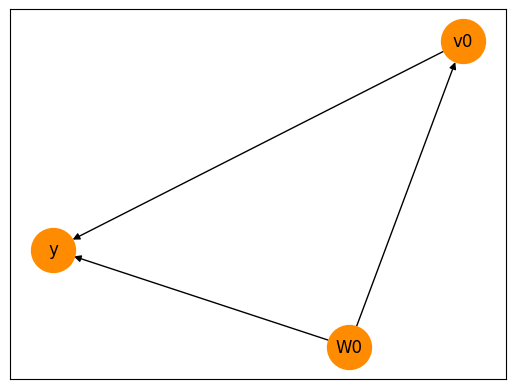

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0']
Instrument vars: []
Effect Modifier vars: []
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          W0        v0         y
W0  1.000000  0.720192  0.843709
v0  0.720192  1.000000  0.980051
y   0.843709  0.980051  1.000000
------- Head --------


,W0,v0,y
0,-0.324851,False,-8.199253
1,0.724045,True,118.277235
2,-0.258303,False,-6.518607
3,0.412029,True,110.413184
4,-0.309622,False,-7.818235


In [4]:
# create a dataset with 10 observations one binary treatment and a continous outcome affected by one common cause
synthetic_data = dowhy.datasets.linear_dataset(beta = 100,
                                               num_common_causes = 1,
                                               num_samples =10
                                               )
describe_synthetic_data(synthetic_data).head()

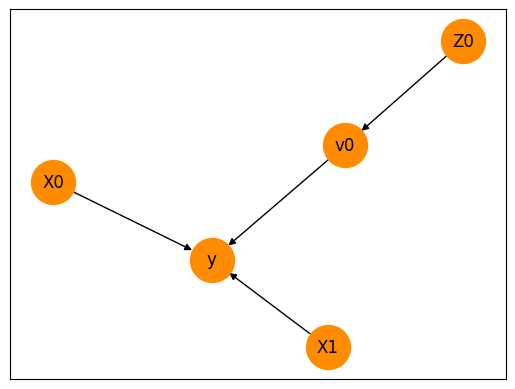

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: []
Instrument vars: ['Z0']
Effect Modifier vars: ['X0', 'X1']
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          X0        X1        Z0        v0         y
X0  1.000000  0.423497 -0.181424 -0.179055 -0.089263
X1  0.423497  1.000000 -0.299687 -0.296083 -0.300742
Z0 -0.181424 -0.299687  1.000000  0.999597  0.963770
v0 -0.179055 -0.296083  0.999597  1.000000  0.966215
y  -0.089263 -0.300742  0.963770  0.966215  1.000000
------- Head --------


,X0,X1,Z0,v0,y
0,0.409558,2.419309,0.0,-0.303587,-58.176855
1,0.866663,-0.713283,1.0,101.469061,11997.247191
2,-0.728831,-0.143788,1.0,99.438977,6191.953268
3,-0.773837,-1.350774,0.0,0.102539,2.447695
4,1.323852,0.375627,0.0,1.754824,301.812294


In [5]:
# Two continuos treatments, no common cause, an instrumental variable and two effect modifiers - linearly added appropriately
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   2, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   0,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()

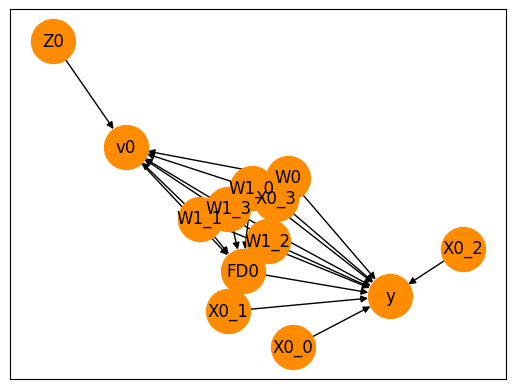

------- Variables --------
Treatment vars: ['v0']
Outcome vars: y
Common causes vars: ['W0', 'W1_0', 'W1_1', 'W1_2', 'W1_3']
Instrument vars: ['Z0']
Effect Modifier vars: ['X0_0', 'X0_1', 'X0_2', 'X0_3']
Frontdoor vars: ['FD0']
Treatment vars: y
-------- Corr -------
           FD0      X0_0      X0_1      X0_2      X0_3        Z0        W0  \
FD0   1.000000  0.131063 -0.300199  0.149147  0.019989  0.935452  0.193465   
X0_0  0.131063  1.000000 -0.333333 -0.333333 -0.333333  0.115470 -0.150671   
X0_1 -0.300199 -0.333333  1.000000 -0.333333 -0.333333 -0.346410 -0.060705   
X0_2  0.149147 -0.333333 -0.333333  1.000000 -0.333333  0.115470  0.237300   
X0_3  0.019989 -0.333333 -0.333333 -0.333333  1.000000  0.115470 -0.025925   
Z0    0.935452  0.115470 -0.346410  0.115470  0.115470  1.000000 -0.100444   
W0    0.193465 -0.150671 -0.060705  0.237300 -0.025925 -0.100444  1.000000   
W1_0 -0.358010 -0.066667 -0.066667 -0.066667  0.200000 -0.346410  0.191444   
W1_1  0.379406  0.200000 -0.06

,FD0,X0_0,X0_1,X0_2,X0_3,Z0,W0,W1_0,W1_1,W1_2,W1_3,v0,y
0,7442.706894,1.0,0.0,0.0,0.0,1.0,1.273530,0.0,0.0,1.0,0.0,164.639189,338088.657239
1,492.605164,0.0,0.0,0.0,1.0,0.0,0.156077,1.0,0.0,0.0,0.0,10.761903,22828.685455
2,7209.641841,0.0,0.0,1.0,0.0,1.0,1.295846,0.0,1.0,0.0,0.0,159.413855,334641.048734
3,457.872280,0.0,1.0,0.0,0.0,0.0,0.253626,0.0,0.0,0.0,1.0,10.065721,20895.273003
4,6469.340321,0.0,0.0,0.0,1.0,1.0,1.558216,1.0,0.0,0.0,0.0,142.966335,299801.690964


In [6]:
# Hot Encoding
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   2,
                              num_samples                   =  20,
                              num_instruments               =   1,
                              num_effect_modifiers          =   1, 
                              num_treatments                =   1,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   1, #of the total num_common_causes
                              num_discrete_instruments      =   1,
                              num_discrete_effect_modifiers =   1,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = True
                                               )
describe_synthetic_data(synthetic_data).head()

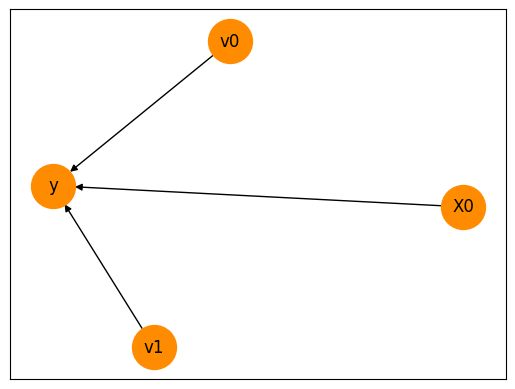

------- Variables --------
Treatment vars: ['v0', 'v1']
Outcome vars: y
Common causes vars: []
Instrument vars: []
Effect Modifier vars: ['X0']
Frontdoor vars: []
Treatment vars: y
-------- Corr -------
          X0        v0        v1         y
X0  1.000000 -0.336581  0.395017 -0.021287
v0 -0.336581  1.000000 -0.025540  0.684492
v1  0.395017 -0.025540  1.000000  0.690797
y  -0.021287  0.684492  0.690797  1.000000
------- Head --------


,X0,v0,v1,y
0,-0.577611,0.454779,-0.475650,1.608059
1,-0.777352,0.107944,-0.609195,-48.599506
2,-0.169779,-0.109132,-0.217770,-32.819383
3,-0.957567,1.352643,0.418517,161.040633
4,0.885910,-0.788047,-1.413134,-190.869176


In [11]:
#Front Door
synthetic_data = dowhy.datasets.linear_dataset(
                              beta                          = 100,
                              num_common_causes             =   0,
                              num_samples                   =  20,
                              num_instruments               =   0,
                              num_effect_modifiers          =   0, 
                              num_treatments                =   2,
                              num_frontdoor_variables       =   1,
                              treatment_is_binary           = False,
                              treatment_is_category         = False,
                              outcome_is_binary             = False,
                              stochastic_discretization     = True,
                              num_discrete_common_causes    =   0,
                              num_discrete_instruments      =   0,
                              num_discrete_effect_modifiers =   0,
                              stddev_treatment_noise        =   1,
                              stddev_outcome_noise          =  0.01,
                              one_hot_encode                = False
                                               )
describe_synthetic_data(synthetic_data).head()